# Download the vae weights from drive link

In [17]:
# ============================================
# Install gdown
# ============================================
!pip install -q gdown

# ============================================
# Download weights from Google Drive
# ============================================
import gdown

file_id = "1e7HoonpTpewzblgeTJRQeFcz68POykfz"
url = f"https://drive.google.com/uc?id={file_id}"

weights_path = "variational_decoder_weights.h5"
gdown.download(url, weights_path, quiet=False)

print("Weights downloaded successfully!")


Downloading...
From: https://drive.google.com/uc?id=1e7HoonpTpewzblgeTJRQeFcz68POykfz
To: /content/variational_decoder_weights.h5
100%|██████████| 3.10M/3.10M [00:00<00:00, 78.1MB/s]

Weights downloaded successfully!


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# ============================================
# Rebuild the decoder architecture
# (must match training exactly)
# ============================================
decoder_input = layers.Input(shape=(4,))
x = layers.Dense(256, activation='relu')(decoder_input)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Reshape((4, 4, 128))(x)
x = layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
x = layers.Conv2D(1, 3, padding='same')(x)
x = layers.Cropping2D(cropping=((2, 2), (2, 2)))(x)

variational_decoder = Model(decoder_input, x, name="variational_decoder")


In [19]:
# ============================================
# Load weights
# ============================================
variational_decoder.load_weights(weights_path)

print("Decoder weights loaded successfully!\n")

# ============================================
# Show model summary
# ============================================
variational_decoder.summary()


Decoder weights loaded successfully!



Model: "variational_decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 8, 8, 128)      │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 16, 16, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 32, 32, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 1)      │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_1 (Cropping2D)       │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 767,745 (2.93 MB)

 Trainable params: 767,745 (2.93 MB)

 Non-trainable params: 0 (0.00 B)

7.5335856e-15 0.7055255


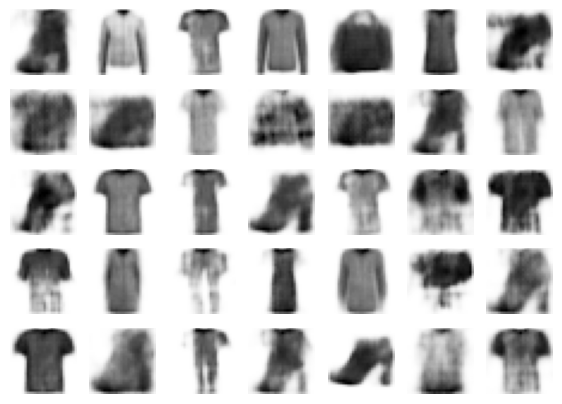

In [25]:

import tensorflow as tf
import matplotlib.pyplot as plt

# ============================================
# TESTING: GENERATE NEW IMAGES
# ============================================
tf.random.set_seed(42)

codings_size = 4   # IMPORTANT: latent dim

codings = tf.random.normal(shape=[35, codings_size])
images = tf.sigmoid(variational_decoder(codings)).numpy() #to ensure images range between 0,1
print(images.min(), images.max())
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1

    if images.shape[-1] == 1:
        images = images.squeeze(axis=-1)

    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

# Plot 5x7 grid
plot_multiple_images(images, 7)
plt.show()

